# Importing and Transforming Data

In [4]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from chord import Chord
pd.set_option('precision', 3)

In [5]:
! pwd

/Users/jenniferzhan/ao3-vizzes/ATLA


In [6]:
df_in = pd.read_csv('atla_fics_1205_full_mod.csv')

#dropping duplicate rows in case the the scraping was restarted at the wrong place
df_in = df_in.drop_duplicates()

df_in.head()

,work_id,title,author,rating,category,fandom,relationship,character,additional tags,language,...,status date,words,chapters,comments,kudos,bookmarks,hits,body,all_kudos,all_bookmarks
0,27896395,Owner of My Heart (Little Pieces),['Neva_Borne'],General Audiences,F/M,Avatar: The Last Airbender,Katara/Zuko (Avatar),"Katara (Avatar), Zuko (Avatar)","fire lord, Fire Lady, ZK Drabble December 2020...",English,...,2020-12-05,415.0,1/1,3.0,32.0,5.0,189,NaN,"['lisannafirevixen', 'MiraculousMultifandom', ...","['lisannafirevixen', 'NickyADon', 'i_guess_the..."
1,27896272,What Started In Beautiful Rooms,['somefanficthoughts'],General Audiences,M/M,Avatar: The Last Airbender,Sokka/Zuko (Avatar),"Sokka (Avatar), Zuko (Avatar), Original Female...","Ambassador Sokka (Avatar), Aged-Up Character(s...",English,...,2020-12-05,878.0,1/?,NaN,35.0,1.0,177,NaN,"['Miss_Rust', 'MissWriter244', 'azura_mist', '...",['oz_s']
2,25574854,The Dragon of the South,['LazyDaydreamerX'],Teen And Up Audiences,Multi,Avatar: The Last Airbender,"Other Relationship Tags to Be Added, Sokka/Zuk...","Sokka (Avatar), Katara (Avatar), Aang (Avatar)...","AU, Firebender Sokka (Avatar), Smart Sokka (Av...",English,...,2020-12-05,66045.0,21/?,175.0,595.0,104.0,11210,NaN,"['hope_lumus', 'molymall', 'FireChildSlytherin...","['hazylavender', 'Mike_Wazowski_God', 'tblu', ..."
3,26838538,Conflagration,['Theodur'],Teen And Up Audiences,"F/M, F/F",Avatar: The Last Airbender,"Katara/Zuko (Avatar), Katara & Zuko (Avatar), ...","Katara (Avatar), Zuko (Avatar), Aang (Avatar),...","Romance, Slow Burn, Mild Smut, Zutara, Friends...",English,...,2020-12-05,54904.0,20/52,50.0,81.0,16.0,3050,NaN,"['JhoanaHere', 'missmango18', 'TheEmptySkies',...","['JhoanaHere', 'TheEmptySkies', 'July19', 'hon..."
4,27896089,Barely Disguised,['cassacain'],General Audiences,F/F,Avatar: The Last Airbender,Mai/Ty Lee (Avatar),"Mai (Avatar), Ty Lee (Avatar), Azula (Avatar),...","mailee, Friends to Lovers",English,...,2020-12-05,1648.0,1/1,2.0,7.0,NaN,59,NaN,"['alligator_writes', 'tarotapioca', 'drogodruo...",[]


In [7]:
df_in.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21711 entries, 0 to 21710
Data columns (total 22 columns):
work_id            21711 non-null int64
title              21711 non-null object
author             21711 non-null object
rating             21711 non-null object
category           20365 non-null object
fandom             21711 non-null object
relationship       18160 non-null object
character          21089 non-null object
additional tags    20023 non-null object
language           21711 non-null object
published          21711 non-null object
status             21711 non-null object
status date        21711 non-null object
words              21705 non-null float64
chapters           21711 non-null object
comments           18474 non-null float64
kudos              21510 non-null float64
bookmarks          19297 non-null float64
hits               21711 non-null int64
body               0 non-null float64
all_kudos          21711 non-null object
all_bookmarks      21711 non-nu

In [8]:
#clean up and add new columns
df_in['character'] = df_in['character'].str.replace('Toph Bei Fong','Toph Beifong')
df_in['relationship'] = df_in['relationship'].str.replace('Toph Bei Fong','Toph Beifong')
df_in['published'] = pd.to_datetime(df_in['published'], format='%Y-%m-%d')
df_in['published_year'] = pd.DatetimeIndex(df_in['published']).year
df_in['pub_date_yr_month'] = df_in['published'].dt.strftime('%Y-%m')
df_in['kudos'] = df_in['kudos'].fillna(0)

In [9]:
df_in.describe()

,work_id,words,comments,kudos,bookmarks,hits,body,published_year
count,2.171e+04,2.170e+04,18474.000,21711.000,19297.000,21711.000,0.0,21711.000
mean,1.834e+07,9.652e+03,38.447,270.276,44.013,3189.777,NaN,2017.962
std,9.774e+06,4.015e+04,148.654,709.742,169.189,9795.340,NaN,3.079
min,8.000e+00,0.000e+00,1.000,0.000,1.000,0.000,NaN,2005.000
25%,1.017e+07,1.061e+03,4.000,29.000,3.000,447.000,NaN,2017.000
50%,2.412e+07,2.397e+03,9.000,80.000,10.000,1099.000,NaN,2020.000
75%,2.606e+07,6.434e+03,25.000,222.000,29.000,2759.000,NaN,2020.000
max,2.792e+07,2.441e+06,7208.000,24584.000,8208.000,748332.000,NaN,2020.000


In [2]:
def square(x):
    return x * x


In [3]:
interact(square, x=10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

In [11]:
agg = {'work_id':'count', 'relationship':'count', 'words':'mean'}

df_date = (df_in.groupby(['pub_date_yr_month'])['work_id','relationship'].agg(agg)
          ).rename(columns={'work_id':'total_works', 'relationship':'total_works_with_relationship', 'words':'average_words'})

df_date['total_gen_fics'] = df_date['total_works'] - df_date['total_works_with_relationship']
df_date['pct_gen_fics'] = df_date['total_gen_fics'] / df_date['total_works']

/Users/jenniferzhan/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


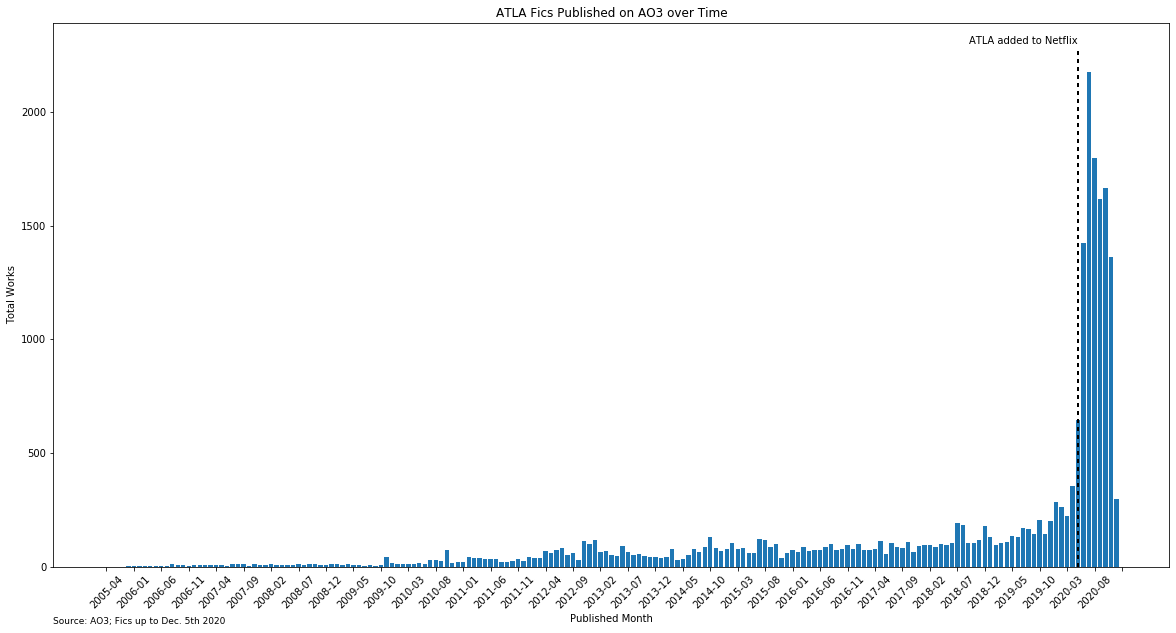

In [12]:
plt.figure(figsize=(20, 10))
x = df_date.index
y = df_date['total_works']
plt.bar(x, y)
plt.plot(['2020-05', '2020-05'], [0, y.max()+100], 'k-', lw=2,dashes=[2, 2])
plt.text('2020-05',2300,'ATLA added to Netflix', horizontalalignment='right')
plt.xticks(np.arange(0, len(x)+1, 5), rotation=45)
plt.xlabel('Published Month')
plt.ylabel('Total Works')
plt.title('ATLA Fics Published on AO3 over Time')
plt.annotate('Source: AO3; Fics up to Dec. 5th 2020', (0,0), (0, -50), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=9)

plt.show()

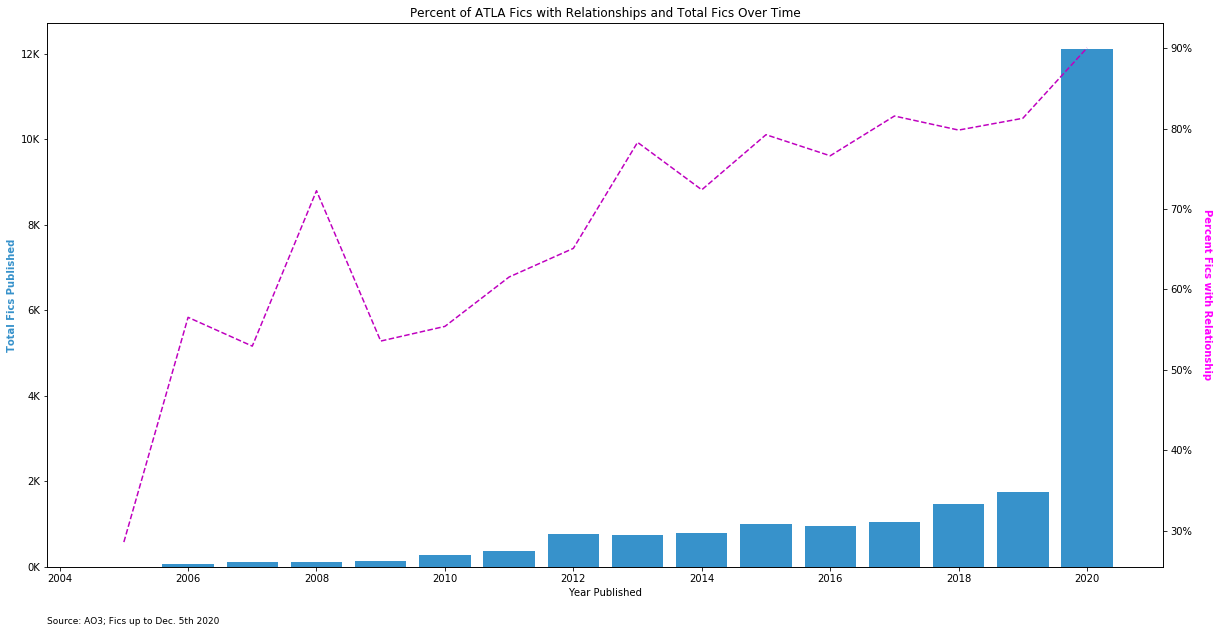

In [13]:
agg = {'work_id':'count', 'relationship':'count', 'words':'mean'}

df_date = (df_in.groupby(['published_year'])['work_id','relationship'].agg(agg)
          ).rename(columns={'work_id':'total_works', 'relationship':'total_works_with_relationship', 'words':'average_words'})

df_date['total_gen_fics'] = df_date['total_works'] - df_date['total_works_with_relationship']
df_date['pct_relationship_fics'] = df_date['total_works_with_relationship'] / df_date['total_works']

x = df_date.index
y1 = df_date['pct_relationship_fics']
y2 = df_date['total_works']

f, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title('Percent of ATLA Fics with Relationships and Total Fics Over Time')
ax2 = ax1.twinx()
ax1.bar(x, y2, color='#3792cb', width=0.8)
ax2.plot(x, y1, '--m')
ax1.set_xlabel('Year Published')

ax1.set_ylabel('Total Fics Published', color='#3792cb', fontweight='bold')
ax2.set_ylabel('Percent Fics with Relationship', color='magenta', fontweight='bold', rotation=270, labelpad=20)

ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))  
ax1.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: '{:,.0f}'.format(x/1000) + 'K'))
#ax1.set_yticklabels(ylabels)
#ax1.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0f}' + 'K'))

plt.annotate('Source: AO3; Fics up to Dec. 5th 2020', (0,0), (0, -50), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=9)

plt.show()

In [14]:
#Filtering only for fics that have at least one tagged relationship
df_with_r = df_in.loc[~df_in.relationship.isna()].copy()

In [15]:
df_with_r['Zuko/Sokka'] = np.where(df_with_r['relationship'].str.contains('Sokka/Zuko') 
                                   | df_with_r['relationship'].str.contains('Zuko/Sokka'), 1, 0)

df_with_r['Zuko/Katara'] = np.where(df_with_r['relationship'].str.contains('Katara/Zuko') 
                                   | df_with_r['relationship'].str.contains('Zuko/Katara'), 1, 0)

agg = {'Zuko/Sokka':'sum', 'Zuko/Katara':'sum', 'work_id':'nunique'}

df_fam = df_with_r.groupby(['published_year']).agg(agg).rename(columns={'work_id':'total_works'})
df_fam['Other_Works'] = df_fam['total_works'] - df_fam['Zuko/Sokka'] - df_fam['Zuko/Katara']

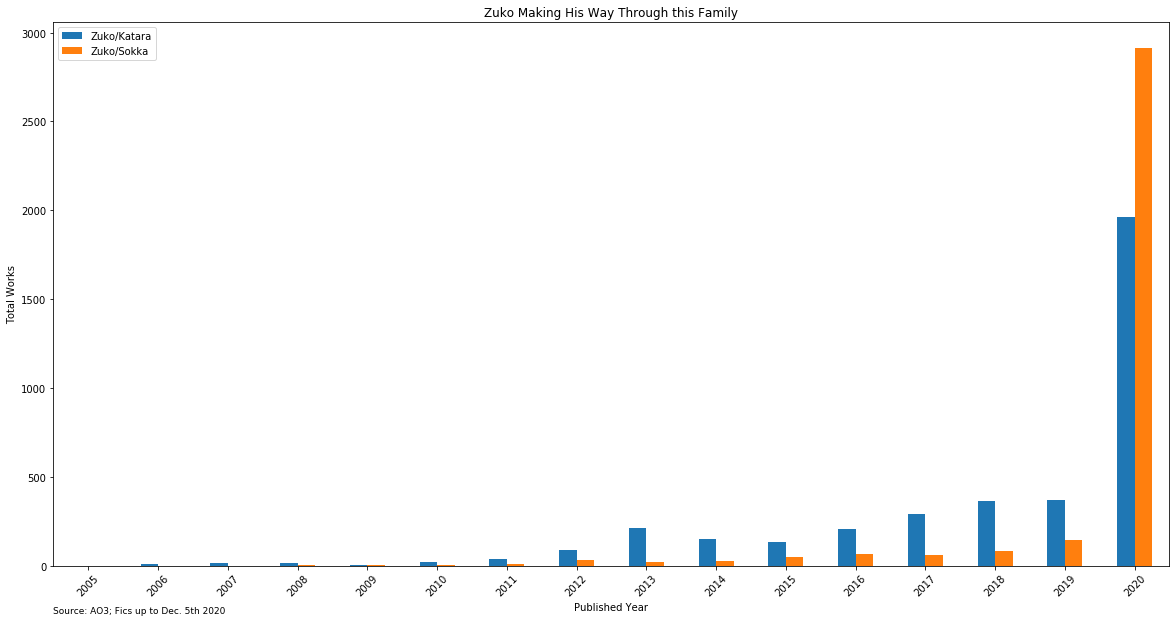

In [16]:
ax = df_fam[['Zuko/Katara', 'Zuko/Sokka']].plot(kind='bar')
fig = ax.get_figure()
fig.set_size_inches(20,10)
plt.title('Zuko Making His Way Through this Family')
plt.xticks(rotation=45)
plt.xlabel('Published Year')
plt.ylabel('Total Works')
plt.annotate('Source: AO3; Fics up to Dec. 5th 2020', (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=9)
plt.show()

In [17]:
#split out multiple ships in one fic
df_r = df_with_r.relationship.str.split(',', expand=True)

#joins back to original df
df_f = pd.concat([df_with_r[['work_id', 'published_year', 'kudos']], df_r], axis = 1)
df_f.head()

,work_id,published_year,kudos,0,1,2,3,4,5,6,...,71,72,73,74,75,76,77,78,79,80
0,27896395,2020,32.0,Katara/Zuko (Avatar),None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,27896272,2020,35.0,Sokka/Zuko (Avatar),None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,25574854,2020,595.0,Other Relationship Tags to Be Added,Sokka/Zuko (Avatar),Minor or Background Relationship(s),None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,26838538,2020,81.0,Katara/Zuko (Avatar),Katara & Zuko (Avatar),Suki/Ty Lee (Avatar),Aang/Katara (Avatar) temporarily,Mai & Zuko (Avatar) temporarily,None,None,...,None,None,None,None,None,None,None,None,None,None
4,27896089,2020,7.0,Mai/Ty Lee (Avatar),None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [18]:
#unpivot by relationship for easy data cleaning 
df_final = pd.melt(df_f, id_vars = ['work_id', 'published_year', 'kudos'], var_name = 'relationship_number', value_name = 'ship')
df_final.head()

,work_id,published_year,kudos,relationship_number,ship
0,27896395,2020,32.0,0,Katara/Zuko (Avatar)
1,27896272,2020,35.0,0,Sokka/Zuko (Avatar)
2,25574854,2020,595.0,0,Other Relationship Tags to Be Added
3,26838538,2020,81.0,0,Katara/Zuko (Avatar)
4,27896089,2020,7.0,0,Mai/Ty Lee (Avatar)


In [19]:
#drop rows where ship is null (since unpivot creates a row for rel_2, rel_40 even if fic only has one ship)
df_final = df_final.dropna(subset = ['ship']).copy()
df_final['relationship_number'] =  df_final['relationship_number'] + 1 
df_final.head()

,work_id,published_year,kudos,relationship_number,ship
0,27896395,2020,32.0,1,Katara/Zuko (Avatar)
1,27896272,2020,35.0,1,Sokka/Zuko (Avatar)
2,25574854,2020,595.0,1,Other Relationship Tags to Be Added
3,26838538,2020,81.0,1,Katara/Zuko (Avatar)
4,27896089,2020,7.0,1,Mai/Ty Lee (Avatar)


In [20]:
ct_rel_num = df_final.groupby('work_id')['relationship_number'].max().to_frame().reset_index()

pct_rel_num = ct_rel_num.groupby('relationship_number')['work_id'].nunique().to_frame().rename(columns={'work_id':'total_works'})
pct_rel_num['pct_total_fics'] = pct_rel_num['total_works'] / pct_rel_num['total_works'].sum().round(3)
pct_rel_num['cum_sum_pct'] = pct_rel_num['pct_total_fics'].cumsum()

pct_rel_num.head(11)
# x = pct_rel_num.index
# y = pct_rel_num['pct_total_fics']

# f, ax = plt.subplots(figsize=(20,10))
# ax.bar(x, y)

,total_works,pct_total_fics,cum_sum_pct
relationship_number,,,
1,9284,0.528,0.528
2,3378,0.192,0.721
3,1804,0.103,0.823
4,1180,0.067,0.890
5,639,0.036,0.927
6,414,0.024,0.950
7,243,0.014,0.964
8,163,0.009,0.973
9,124,0.007,0.980


In [21]:
#Removing the name of the media at the end of the ship (e.g., 'Zuko/Katara (Avatar)' becomes 'Zuko/Katara')
df_final['ship'] = df_final.ship.str.replace(' \(.+\)', '')
df_final.head()

,work_id,published_year,kudos,relationship_number,ship
0,27896395,2020,32.0,1,Katara/Zuko
1,27896272,2020,35.0,1,Sokka/Zuko
2,25574854,2020,595.0,1,Other Relationship Tags to Be Added
3,26838538,2020,81.0,1,Katara/Zuko
4,27896089,2020,7.0,1,Mai/Ty Lee


In [22]:
#split out ship into the characters
#note that I am only looking at romantic ships right now--platonic denoted by & will be discarded
df_char = df_final.ship.str.split('/', expand=True)
df_char = df_char.add_prefix('char_')

#joins back to original df
df_final = pd.concat([df_final, df_char], axis = 1)
df_final.head(10)

,work_id,published_year,kudos,relationship_number,ship,char_0,char_1,char_2,char_3,char_4,char_5,char_6,char_7
0,27896395,2020,32.0,1,Katara/Zuko,Katara,Zuko,None,None,None,None,None,None
1,27896272,2020,35.0,1,Sokka/Zuko,Sokka,Zuko,None,None,None,None,None,None
2,25574854,2020,595.0,1,Other Relationship Tags to Be Added,Other Relationship Tags to Be Added,None,None,None,None,None,None,None
3,26838538,2020,81.0,1,Katara/Zuko,Katara,Zuko,None,None,None,None,None,None
4,27896089,2020,7.0,1,Mai/Ty Lee,Mai,Ty Lee,None,None,None,None,None,None
5,27857221,2020,0.0,1,Nara Shikadai /Yue,Nara Shikadai,Yue,None,None,None,None,None,None
6,27896023,2020,17.0,1,Katara/Sokka,Katara,Sokka,None,None,None,None,None,None
7,26363311,2020,166.0,1,Azula/Ty Lee,Azula,Ty Lee,None,None,None,None,None,None
8,27626618,2020,1.0,1,Azula & Ozai,Azula & Ozai,None,None,None,None,None,None,None
9,27831793,2020,47.0,1,Azula/Ty Lee,Azula,Ty Lee,None,None,None,None,None,None


In [23]:
for col in [col for col in df_final.columns if col.startswith('char')]:
    df_final[col] = df_final[col].str.strip()

In [24]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43293 entries, 0 to 1461100
Data columns (total 13 columns):
work_id                43293 non-null int64
published_year         43293 non-null int64
kudos                  43293 non-null float64
relationship_number    43293 non-null object
ship                   43293 non-null object
char_0                 43293 non-null object
char_1                 26386 non-null object
char_2                 833 non-null object
char_3                 65 non-null object
char_4                 18 non-null object
char_5                 12 non-null object
char_6                 7 non-null object
char_7                 7 non-null object
dtypes: float64(1), int64(2), object(10)
memory usage: 4.6+ MB


In [25]:
#checking the rows don't have any second character 
#almost entirely because the fic's ship was tagged with a portmanteau or is about a platonic ship 
df_final.loc[df_final['char_1'].isna()].head()

,work_id,published_year,kudos,relationship_number,ship,char_0,char_1,char_2,char_3,char_4,char_5,char_6,char_7
2,25574854,2020,595.0,1,Other Relationship Tags to Be Added,Other Relationship Tags to Be Added,None,None,None,None,None,None,None
8,27626618,2020,1.0,1,Azula & Ozai,Azula & Ozai,None,None,None,None,None,None,None
10,27895120,2020,5.0,1,Toph Beifong & Zuko,Toph Beifong & Zuko,None,None,None,None,None,None,None
12,27895168,2020,9.0,1,Katara & Sokka,Katara & Sokka,None,None,None,None,None,None,None
18,27616522,2020,5.0,1,Zuko,Zuko,None,None,None,None,None,None,None


In [26]:
#Removing those rows for now 
df_final = df_final.dropna(subset=['char_1']).reset_index()

In [27]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26386 entries, 0 to 26385
Data columns (total 14 columns):
index                  26386 non-null int64
work_id                26386 non-null int64
published_year         26386 non-null int64
kudos                  26386 non-null float64
relationship_number    26386 non-null object
ship                   26386 non-null object
char_0                 26386 non-null object
char_1                 26386 non-null object
char_2                 833 non-null object
char_3                 65 non-null object
char_4                 18 non-null object
char_5                 12 non-null object
char_6                 7 non-null object
char_7                 7 non-null object
dtypes: float64(1), int64(3), object(10)
memory usage: 2.8+ MB


In [28]:
#For transforming the data into the input for the chord chart 
def create_matrix(data_input
                  , max_rel_num = 1
                  , max_pub_year = df_final['published_year'].max()
                  , min_pub_year = df_final['published_year'].min()
                  , min_num_kudos = 0
                  , min_num_fics = 10 
                  ):    

    #filter the dataframe based on relationship number, published period, and min kudos
    df_final_1 = data_input.loc[(data_input['relationship_number'] <= max_rel_num) 
                              & (data_input['published_year'] >= min_pub_year)
                              & (data_input['published_year'] <= max_pub_year)
                              & (data_input['kudos'] >= min_num_kudos)
                             ]
    
    total_num_fics = df_final_1['work_id'].nunique()
   # print('The dataset includes ' + str(total_num_fics) + ' fics.')
   # print(' ')
    
    #Getting combinations of Char 0 and Char 1
    cooccurrence = pd.crosstab(index=[df_final_1['char_0']], columns=[df_final_1['char_1']])
    #Getting total list of unique characters
    chars = np.unique(df_final_1[['char_0', 'char_1']].values)
    #Reindexing so both rows and columns contain all characters
    cooccurrence = cooccurrence.reindex(index=chars, columns=chars)
    #Making it symmetrical 
    cooccurrence = cooccurrence.add(cooccurrence.T, fill_value=0)
    #Replacing NAs with 0s 
    cooccurrence = cooccurrence.fillna(0)
    
    #Check the accuracy of the matrix 
    check_1a = len(df_final_1.loc[((df_final_1['char_0'] == 'Zuko')& (df_final_1['char_1'] == 'Katara'))
               |((df_final_1['char_0'] == 'Katara')& (data_input['char_1'] == 'Zuko'))])
    check_1b = cooccurrence.Zuko['Katara']
    check_1c = cooccurrence.Katara['Zuko']

    if check_1a == check_1b == check_1c:
        print(f'The matrix is correct.\n')
    else: 
        print(f'Something went wrong with the matrix.\n')
    
    max_fics = cooccurrence.max().max()
    print(f'The most popular pairing has {max_fics} fics.\n')
    
    #For filtering for ships that have at least N fics
    cooccur_f = cooccurrence.copy()

    #Set pairings with fewer than N fics to zero
    cooccur_f[cooccur_f <= min_num_fics] = 0
    #Then filter out rows and columns that sum to zero (i.e., character does not pair with any other more than 5 times)
    cooccur_f = cooccur_f.loc[(cooccur_f.sum(axis=1) != 0), (cooccur_f.sum(axis=0) != 0)]
    
    #Set what matrix we want to try 
    matrix = cooccur_f

    #Get list of characters for chord labels
    names = list(matrix.columns)
    values = matrix.values.tolist()
    num_char = len(names)
    print(f'This chart encompasses {total_num_fics} fics published on AO3 between {min_pub_year} and {max_pub_year}, with at least {min_num_kudos} kudos.') 
    print(f'Only the top {max_rel_num} tagged ships per fic are included. There are {num_char} characters in this chart.\n')

    chart = Chord(values, names
                  , margin = 40
                  , width = 600
                  , colors="d3.schemeSet3"
                  , opacity=0.8
                  , font_size="10px"
                  , font_size_large="15px"
                  , padding=0.03
                 )
    
    chart.show()
    return names, values, chart

In [29]:
names_2020, values_2020, chart_2020 = create_matrix(df_final, 
                              max_rel_num = 2,
                              min_num_fics = 50, 
                              max_pub_year = 2020)

The matrix is correct.

The most popular pairing has 3667.0 fics.

This chart encompasses 14235 fics published on AO3 between 2005 and 2020, with at least 0 kudos.
Only the top 2 tagged ships per fic are included. There are 23 characters in this chart.



In [30]:
names_2019, values_2019, chart_2019 = create_matrix(df_final, 
                              max_rel_num = 2,
                              min_num_fics = 30, 
                              max_pub_year = 2019)

The matrix is correct.

The most popular pairing has 1830.0 fics.

This chart encompasses 6043 fics published on AO3 between 2005 and 2019, with at least 0 kudos.
Only the top 2 tagged ships per fic are included. There are 17 characters in this chart.



In [34]:
interact(create_matrix, data_input=df_final
         , max_rel_num={1:'1', 2:'2', 3:'3'}
         , max_pub_year=(2019,2020)
         , min_pub_year=(2005,2008)
         , min_num_kudos=(0,100));

interactive(children=(Dropdown(description='data_input', options=('index', 'work_id', 'published_year', 'kudos…

In [ ]:
data_input
                  , max_rel_num = 1
                  , max_pub_year = df_final['published_year'].max()
                  , min_pub_year = df_final['published_year'].min()
                  , min_num_kudos = 0
                  , min_num_fics = 10 
                    
                    number={'One': 1, 'Five': 5, 'Ten': 10})